# 8. 미니 프로젝트: ARIMA, ARCH

In [ ]:
# 먼저 데이터가 저장된 폴더를 연결합시다.
#!mkdir -p aiffel/time_series_basic 
# !ln -s data/* aiffel/time_series_basic
#!cp data/AirPassengers.csv aiffel/time_series_basic/

In [3]:
%pip install arch==6.3.0
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 666.1/666.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # acf plot 및 pacf plot을 그리기 위한 라이브러리
from statsmodels.tsa.arima_model import ARIMA # ARIMA 모델
import pmdarima as pm # Auto ARIMA 모델

In [2]:
ap = pd.read_csv('~/Downloads/AirPassengers.csv')
ap.drop('Month', axis = 1, inplace = True)

In [3]:
ap

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


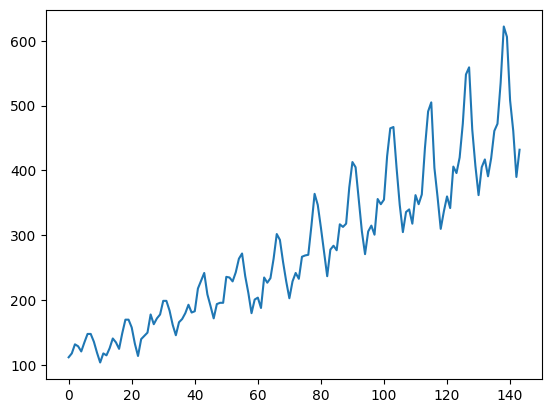

In [4]:
plt.plot(ap)
plt.show()

④ 분산을 일정하게 만들기 - log transformation
로그변환(Log Transformation)을 통해 분산을 일정하게 조절합니다.
분산이 일정하게 적용되었는지 시각화한 후 확인합니다.

In [7]:
# np.log를 통해서 log transformation
ap_transformed = np.log1p(ap)

In [8]:
ap_transformed

,#Passengers
0,4.727388
1,4.779123
2,4.890349
3,4.867534
4,4.804021
...,...
139,6.408529
140,6.232448
141,6.135565
142,5.968708


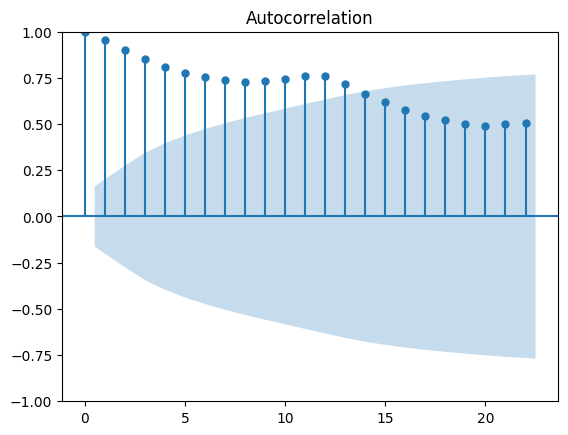

In [9]:
plot_acf(ap_transformed) # acf plot, 점차 감소하는 모양새를 지니고 있음
plt.plot();

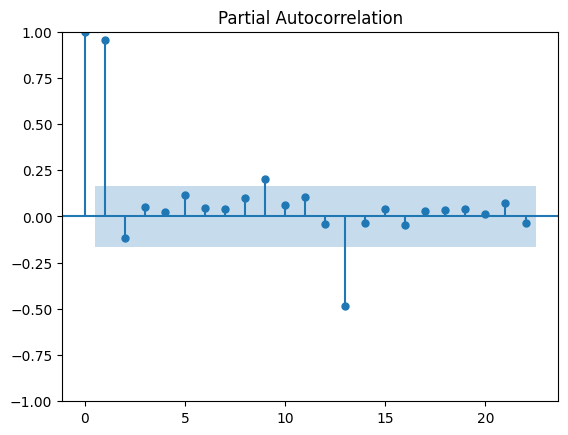

In [10]:
plot_pacf(ap_transformed) # pacf plot, lag 2까지 유의미한 결과를 보임
plt.plot();

⑤ 차분을 통해 분석하기
ACF, PACF Plot과 차분을 활용하여 분석합니다.

In [11]:
ap_diff = ap_transformed.diff()
ap_diff = ap_diff.dropna()

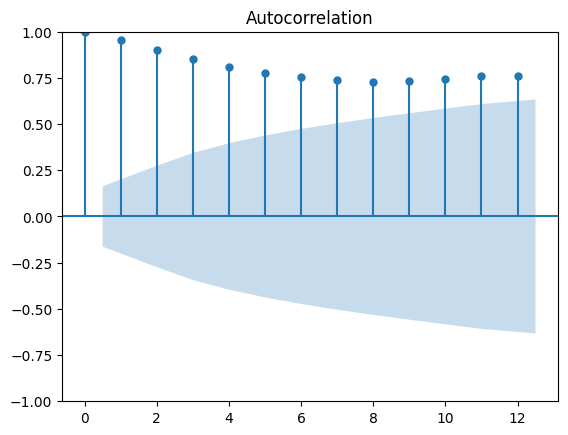

In [17]:
# lag 1과 lag 12에서 유의미한 lag가 포착됨
plot_acf(ap_transformed, lags=12)
plt.show()

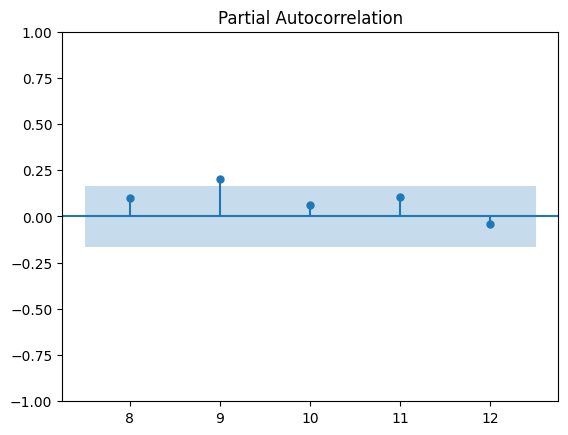

In [ ]:
# lag 1, lag 8~12쯤에서 유의미한 lag가 포착됨

plot_pacf(ap_transformed, lags=range(8,13))
plt.plot();

acf와 pacf에서 n = 12 즈음에서 유의미한 상관관계 관찰됨 / 계절성 성분으로 추측
=> ARIMA를 적용할 때에 계절성 요인도 고려해야

In [22]:
ap_transformed

,#Passengers
0,4.727388
1,4.779123
2,4.890349
3,4.867534
4,4.804021
...,...
139,6.408529
140,6.232448
141,6.135565
142,5.968708


In [23]:
#테스트할 부분 
train_size = int(len(ap_transformed)*0.8)

ap_transformed_train = ap_transformed[:train_size]
ap_transformed_test = ap_transformed[train_size:-1]

## ⑥ Auto ARIMA 적용 및 결과 확인
AutoARIMA 내부 인자의 의미를 알아봅시다.
seasonal : False인 경우 non-seasonal model로 제한합니다.      <== True
suppress_warnings : ARIMA를 실행하면 생기는 에러문구를 나오지 않도록 해줍니다.
trace : True일 때 오류(error)가 발생하면 일부 내용을 출력합니다.
max_D : seasonal의 최대 값을 설정할 수 있습니다.                <== 12

In [24]:
# AutoARIMA
# seasonal = True, max_D(계절차분) = 12
model = pm.AutoARIMA(seasonal = True, suppress_warnings = True, trace = True, max_D = 12) 
res = model.fit(ap_transformed_train)

/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finit

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-190.829, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-192.148, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-193.761, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-191.052, Time=0.01 sec


/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finit

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-197.840, Time=0.08 sec


/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec


/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-198.011, Time=0.10 sec


/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec


/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-197.689, Time=0.07 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 2.214 seconds


/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [25]:
# confidence interval까지 도출
preds, conf_int = res.predict(n_periods=ap_transformed_test.shape[0], return_conf_int=True) 

# 아래의 코드 결과값을 서로 비교 분석해봅시다.
print(preds.shape) 
print(type(preds))
print('--'*40)
print(preds.shape[0])
print(type(preds.shape[0]))
# print('--'*40)
# print(preds)
# print('--'*40)
# print(conf_int)

(28,)
<class 'pandas.core.series.Series'>
--------------------------------------------------------------------------------
28
<class 'int'>


/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


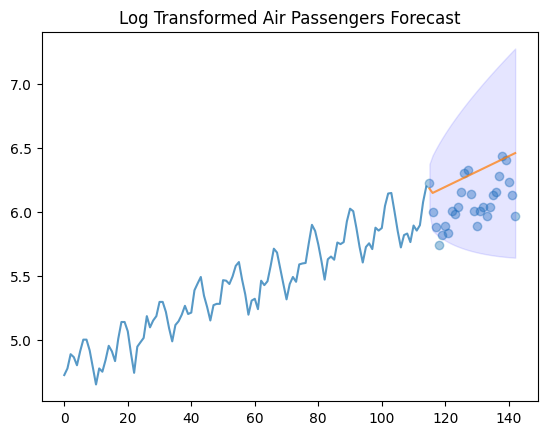

In [26]:
# 예측 성능을 시각화합니다. 
# 0. train과 test data를 축(axis)으로 만들었습니다.
# 1. x축은 test으로 만들어 놓은 train data를 사용하고, y축에 train data를 사용하여 train data를 시각화 합니다.
# 2. 1번 그래프에서 정답(AutoARIMA를 통해 만든 예측 값)에 해당하는 일자형 그래프가 생성됩니다.
# 3. 원래 가지고 있던 데이터셋의 y값(지도 학습의 정답)을 산점도(scatter plot)로 생성합니다.
# 4. 2, 3번의 분포에 해당하는 구간을 채워 그래프로 나타냈습니다.
x_axis = np.arange(ap_transformed_train.shape[0] + preds.shape[0]) # 115 + 29, plot을 그리기 위해 x축을 생성합니다. # 0
plt.plot(x_axis[:ap_transformed_train.shape[0]],ap_transformed_train, alpha=0.75) # 1
plt.plot(x_axis[ap_transformed_train.shape[0]:], preds, alpha=0.75) # 2
plt.scatter(x_axis[ap_transformed_train.shape[0]:],ap_transformed_test, 
            alpha=0.4, marker='o')  # 3 기존 test data는 scatter
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b') # 4
plt.title("Log Transformed Air Passengers Forecast") # plot의 제목
plt.show() # 4개의 plot을 시각화 합니다.

## ⑦ ARCH 모델 실습해보기 / SP500 dataset

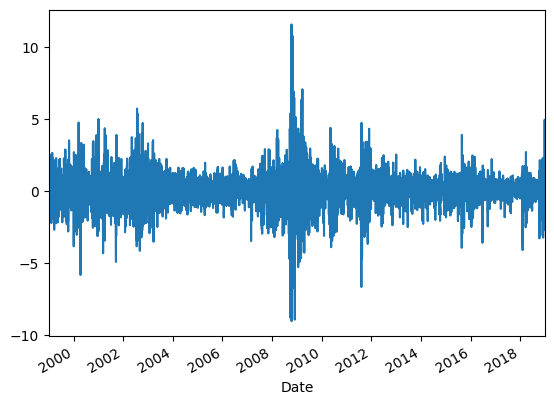

In [ ]:
# ⑦-1 : 데이터 및 라이브러리 불러오기 
import datetime as dt # 날짜와 시간을 조작할 수 있는 Python 라이브러리 입니다 .
import arch.data.sp500 # S&P 500 데이터셋을 arch에서 불러옵니다.

# ⑦-2 : 필요한 데이터로 가공하고 시각화를 통해 확인하기
st = dt.datetime(2002, 1, 1) # start date
en = dt.datetime(2022, 1, 1) # end date
data = arch.data.sp500.load() # s&p 500 데이터 불러오기
market = data["Adj Close"] # 종가만 활용
returns = 100 * market.pct_change().dropna() # 전일 대비 수익률 계산 (Pt/Pt-1 - 1) 후 Nan 제거
ax = returns.plot() # 수익률을 그래프로 만들기
xlim = ax.set_xlim(returns.index.min(), returns.index.max()) # xlim은 x축 값의 보기를 제한 합니다. 
plt.show()

조건부 이분산성이 나타남
조건부 이분산성(Conditional Heteroskedasticity)은 시계열 데이터에서 오차항의 분산이 시간에 따라 변하는 현상으로 
다음과 같은 특징을 보임.
- 변동성 군집화(Volatility Clustering): 큰 변동 뒤에는 큰 변동이, 작은 변동 뒤에는 작은 변동이 따라오는 경향 (확인가능)
- 두터운 꼬리(Fat Tails): 정규분포보다 극값이 더 자주 발생
- 비대칭성: 음의 충격이 양의 충격보다 변동성에 더 큰 영향을 미치는 경우가 많음

In [ ]:
# ⑦-3 : ARCH 모델 적용
from arch import arch_model

am = arch_model(returns) # return을 arch모델에 적합
res = am.fit(update_freq=5)

# ⑦-4 : 지표를 통한 결과 확인
print(res.summary())
# 다양한 결과가 제시되어있으나, p-value, AIC, BIC위주로 내용을 파악
# 아래에 있는 volatility model을 보면 alpha[1], Beta[1]은 GARCH(1,1)을 의미하며, p-value를 통해 신뢰도 95%에서 이들이 유의미함을 도출

Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.2765831170655
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477482658
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476988985
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Mon, May 26 2025   Df Residuals:                     5029
Time:         

S&P 500 지수의 일일 수익률 변화를 보여주는 시계열 그래프

- 2008년 금융위기, 2020년 코로나19 등의 시기에 큰 변동성을 확인할 수 있음
- 변동성 군집화 현상 관찰 가능
- 일반적으로 -10%에서 +10% 사이의 수익률 분포

자동적으로 GARCH 모델에 적합되는 것을 확인(Constant Mean - GARCH Model)
변동성 모델 (Volatility Model)
GARCH(1,1): σₜ² = ω + α₁εₜ₋₁² + β₁σₜ₋₁²

모델 적합도
R-squared: 0.000 → 평균모델이 수익률 변동을 설명하지 못함 (정상적)
AIC: 13,881.4, BIC: 13,907.5 → 모델 비교 시 사용하는 정보기준

경제적 해석
높은 지속성: 금융시장의 변동성 군집화 현상을 잘 포착
ARCH < GARCH: 과거 변동성(β₁=0.89)이 최근 충격(α₁=0.10)보다 더 중요
모든 계수 유의: 통계적으로 신뢰할 수 있는 추정치

이 결과는 S&P 500의 변동성이 시간에 따라 변하며, 변동성 충격이 장기간 지속되는 특성을 잘 보여줌



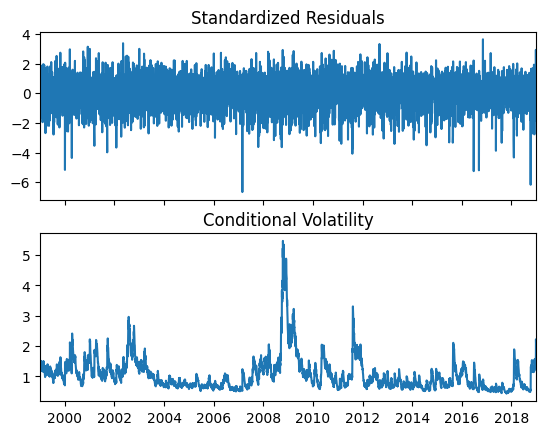

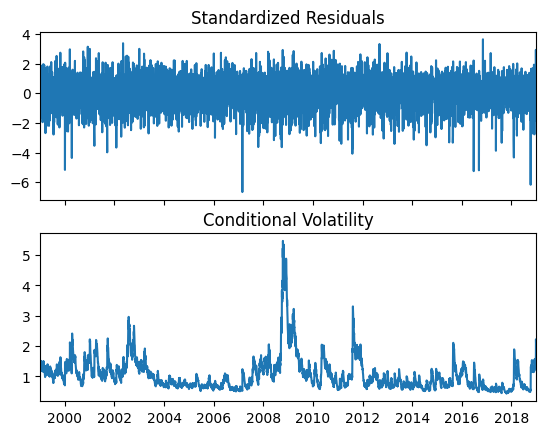

In [29]:
# ⑦-5 : 시각화를 통한 결과값 확인
res.plot()

모델 적합 후 남은 잔차(Residual)와 포착한 조건부 변동성(conditional volatility)을 시각적으로 확인할 수 있음